In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('data/indian_cities.csv', index_col=0)

In [23]:
df

,City,State,Population,Metro_Population,Sexratio,Literacy
Rank,,,,,,
1,Mumbai,Maharashtra,12442373,18414288,853,89.73
2,Delhi,Delhi,11034555,16314838,876,87.59
3,Bangalore,Karnataka,8443675,8499399,923,88.71
4,Hyderabad,Andhra Pradesh,6731790,7749334,955,83.26
5,Ahmedabad,Gujarat,5577940,6352254,898,88.29
...,...,...,...,...,...,...
494,Gangtok,Sikkim,100286,100286,912,89.33
495,Datia,Madhya Pradesh,100284,100284,900,80.56
496,Nagda,Madhya Pradesh,100039,100039,947,80.71


In [24]:
df.columns.tolist()

['City', 'State', 'Population', 'Metro_Population', 'Sexratio', 'Literacy']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 1 to 498
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              498 non-null    object 
 1   State             498 non-null    object 
 2   Population        498 non-null    int64  
 3   Metro_Population  498 non-null    int64  
 4   Sexratio          498 non-null    int64  
 5   Literacy          498 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 27.2+ KB


In [26]:
df['City'].nunique() # number of unique cities

497

In [27]:
df.drop_duplicates(subset='City', inplace=True) # remove duplicate cities


'''
    UNIVARIATE ANALYSIS
                        '''

In [28]:
df['State'].value_counts()

Uttar Pradesh                  64
West Bengal                    61
Maharashtra                    44
Andhra Pradesh                 42
Tamil Nadu                     32
Madhya Pradesh                 32
Gujarat                        30
Rajasthan                      29
Karnataka                      26
Bihar                          25
Haryana                        20
Punjab                         17
Delhi                          15
Orissa                         10
Jharkhand                      10
Chhattisgarh                    9
Kerala                          7
Uttarakhand                     6
Assam                           4
Jammu and Kashmir               3
Puducherry                      2
Chandigarh                      1
Tripura                         1
Mizoram                         1
Manipur                         1
Himachal Pradesh                1
Meghalaya                       1
Nagaland                        1
Andaman and Nicobar Islands     1
Sikkim        

In [29]:
df['State'].value_counts().head()

Uttar Pradesh     64
West Bengal       61
Maharashtra       44
Andhra Pradesh    42
Tamil Nadu        32
Name: State, dtype: int64

<AxesSubplot: title={'center': 'State wise city count'}>

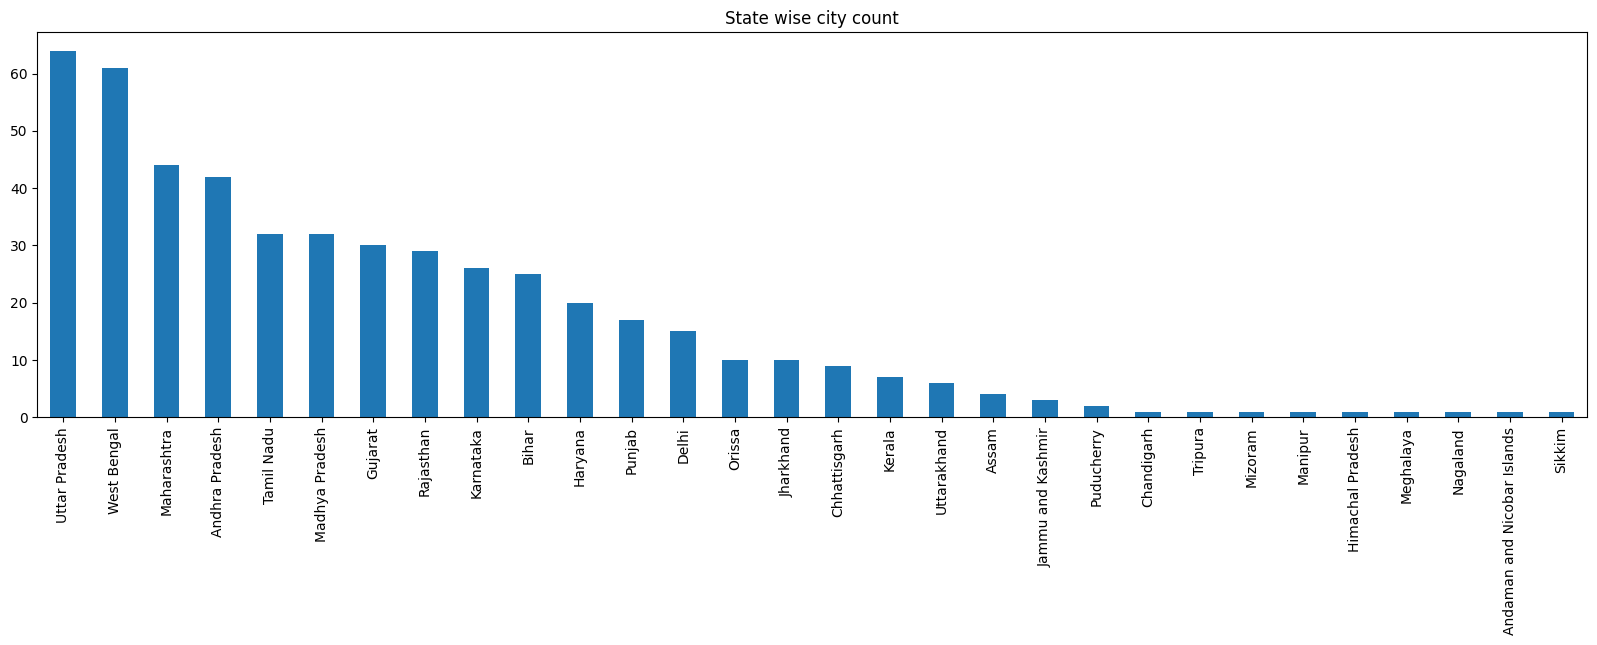

In [30]:
df['State'].value_counts().plot(kind='bar', figsize=(20, 5), title='State wise city count')

<AxesSubplot: title={'center': 'State wise city count'}, ylabel='State'>

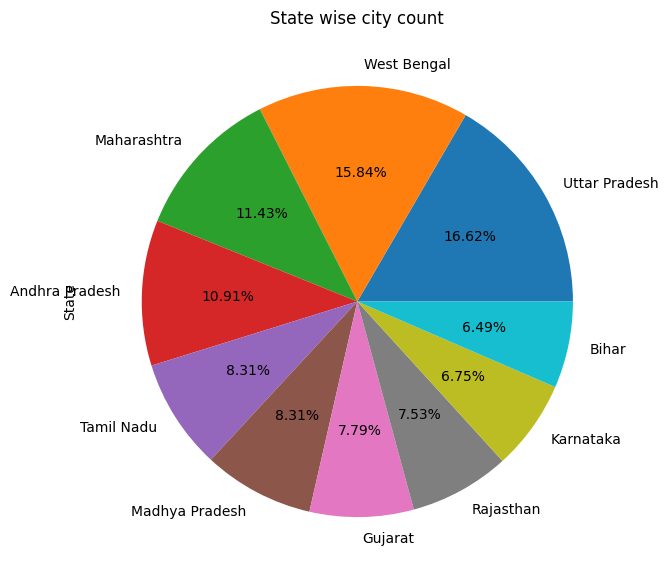

In [31]:
df['State'].value_counts().head(10).plot(kind='pie', autopct='%.2f%%', 
    figsize=(7, 7), title='State wise city count')

In [32]:
df

,City,State,Population,Metro_Population,Sexratio,Literacy
Rank,,,,,,
1,Mumbai,Maharashtra,12442373,18414288,853,89.73
2,Delhi,Delhi,11034555,16314838,876,87.59
3,Bangalore,Karnataka,8443675,8499399,923,88.71
4,Hyderabad,Andhra Pradesh,6731790,7749334,955,83.26
5,Ahmedabad,Gujarat,5577940,6352254,898,88.29
...,...,...,...,...,...,...
494,Gangtok,Sikkim,100286,100286,912,89.33
495,Datia,Madhya Pradesh,100284,100284,900,80.56
496,Nagda,Madhya Pradesh,100039,100039,947,80.71


In [33]:
df.set_index('City', inplace=True)

<AxesSubplot: title={'center': 'Population of cities'}, xlabel='City'>

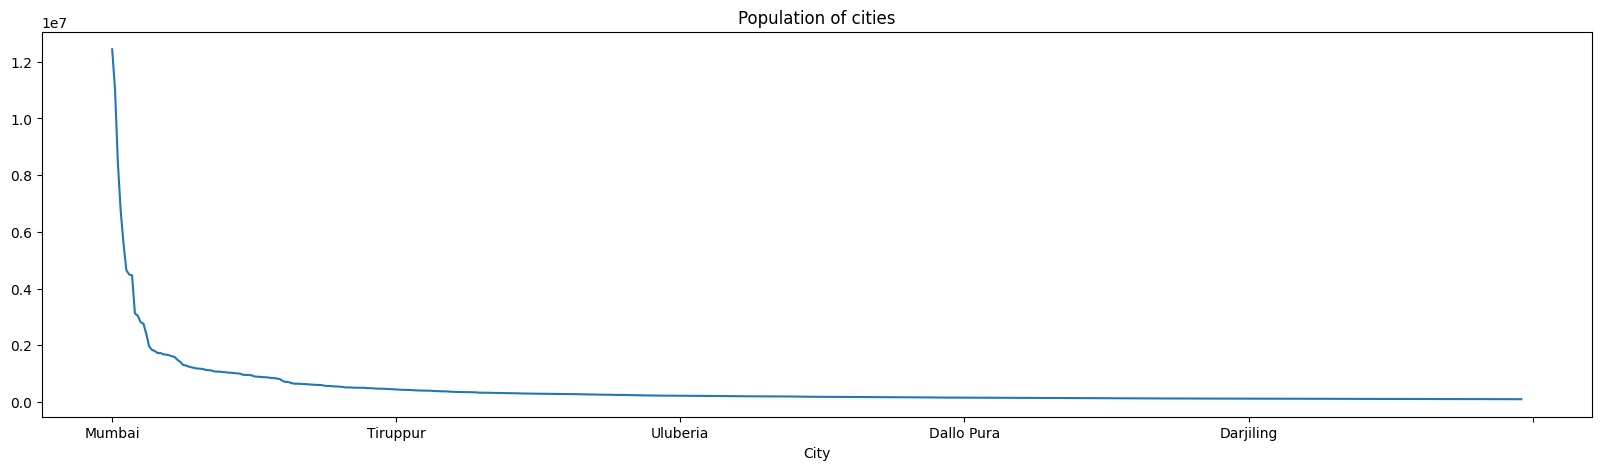

In [34]:
df["Population"].plot(kind='line', figsize=(20, 5), title='Population of cities')


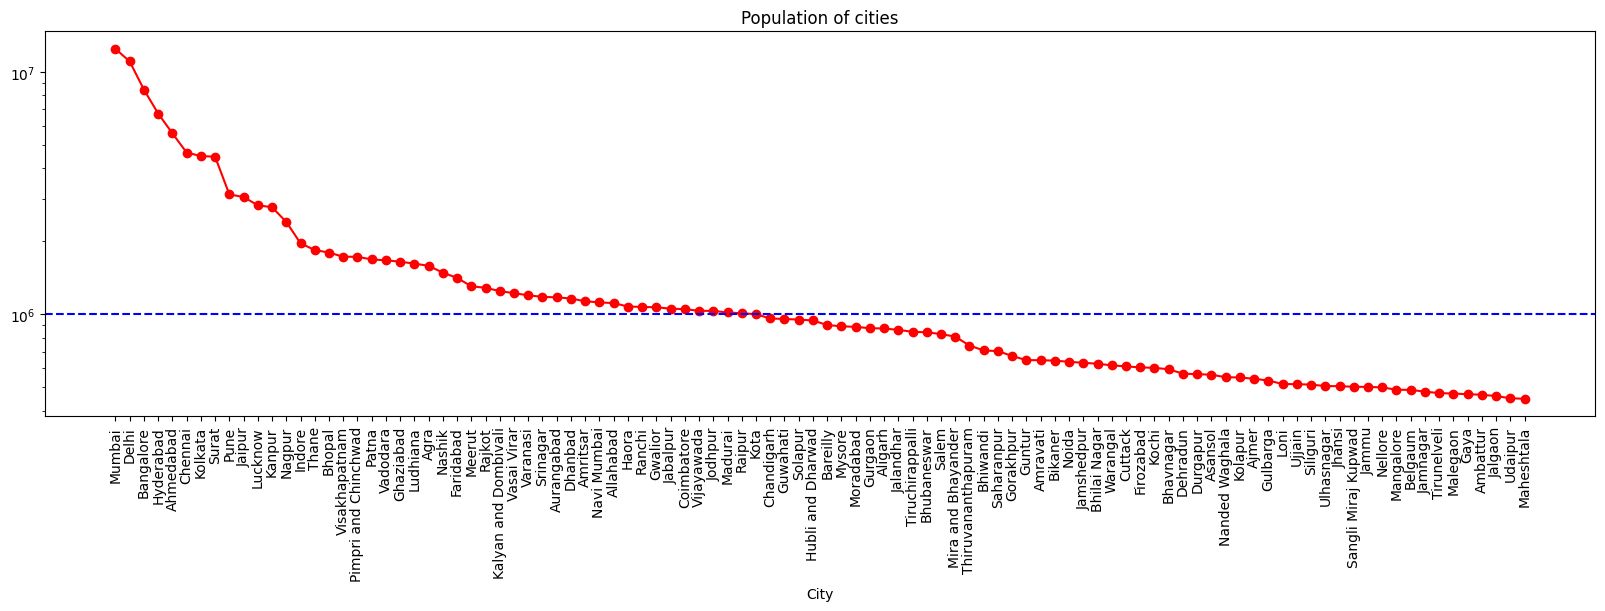

In [35]:
df["Population"].head(100).plot(kind='line', figsize=(20, 5),
     title='Population of cities', style='ro-', logy=True)
ticks = np.arange(0, 100)
# draw a line
plt.axhline(y=10**6, color='b', linestyle='--')
plt.xticks(ticks, df.index[ticks], rotation=90)
plt.show()


<AxesSubplot: ylabel='Frequency'>

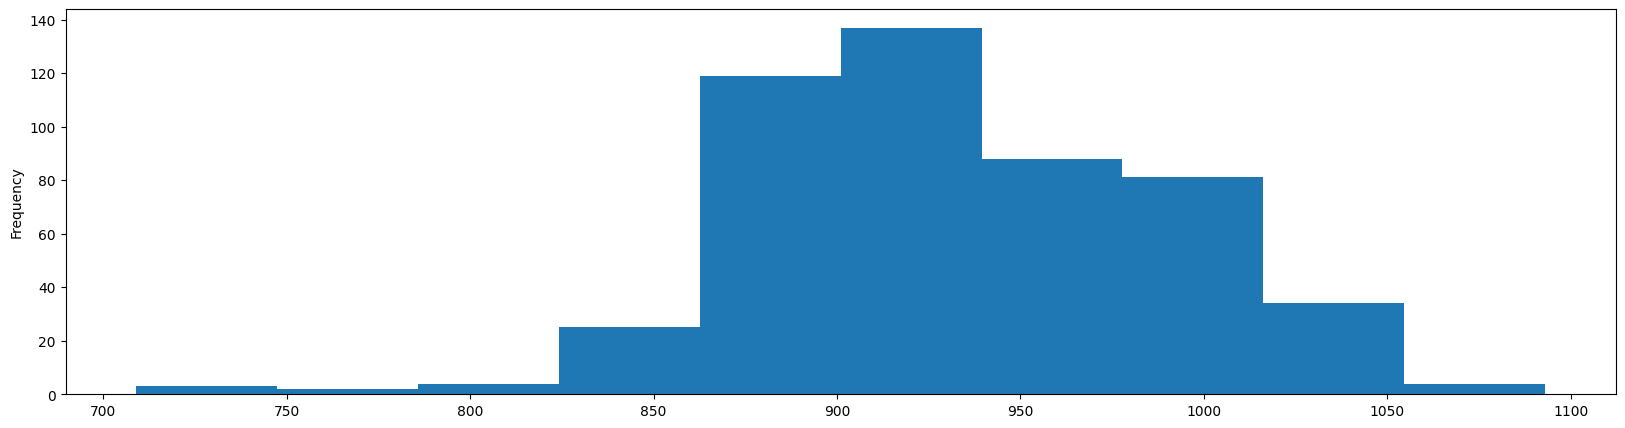

In [36]:
df['Sexratio'].plot(kind='hist', figsize=(20, 5))

<AxesSubplot: xlabel='City'>

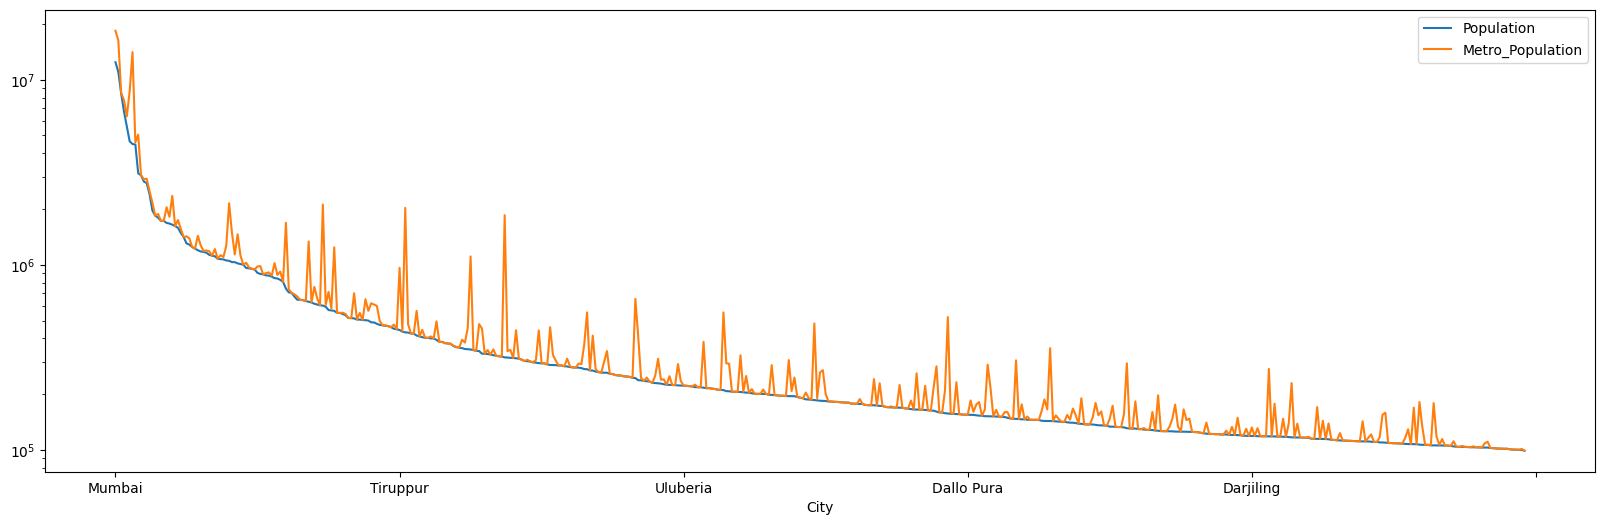

In [37]:
df[['Population','Metro_Population']].plot(kind='line', figsize=(20,6),logy=True)


In [38]:
df.sort_values(by='Metro_Population',ascending=False)


,State,Population,Metro_Population,Sexratio,Literacy
City,,,,,
Mumbai,Maharashtra,12442373,18414288,853,89.73
Delhi,Delhi,11034555,16314838,876,87.59
Kolkata,West Bengal,4496694,14112536,908,86.31
Chennai,Tamil Nadu,4646732,8696010,989,90.18
Bangalore,Karnataka,8443675,8499399,923,88.71
...,...,...,...,...,...
Kalyani,West Bengal,100575,100575,983,87.90
Gangtok,Sikkim,100286,100286,912,89.33
Datia,Madhya Pradesh,100284,100284,900,80.56


In [39]:
df['Pop_Diff'] = df['Metro_Population'] - df['Population']
df.head()


,State,Population,Metro_Population,Sexratio,Literacy,Pop_Diff
City,,,,,,
Mumbai,Maharashtra,12442373,18414288,853,89.73,5971915
Delhi,Delhi,11034555,16314838,876,87.59,5280283
Bangalore,Karnataka,8443675,8499399,923,88.71,55724
Hyderabad,Andhra Pradesh,6731790,7749334,955,83.26,1017544
Ahmedabad,Gujarat,5577940,6352254,898,88.29,774314


<AxesSubplot: xlabel='City'>

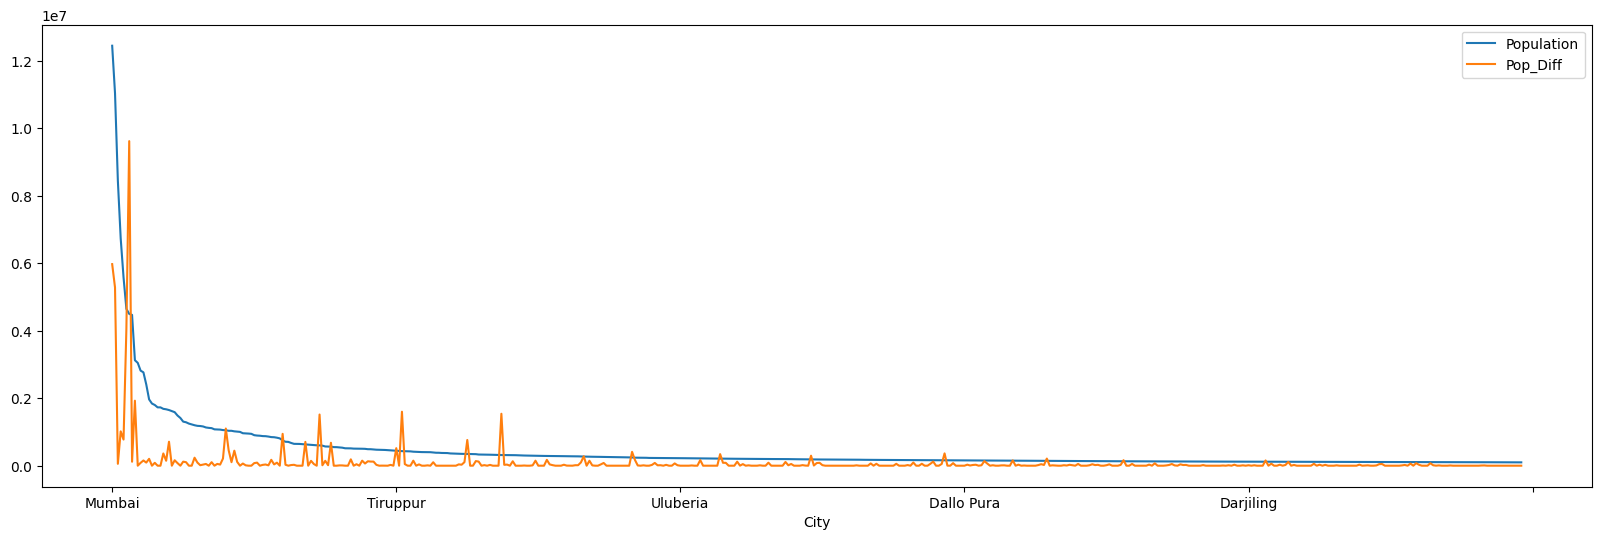

In [40]:
df[['Population','Pop_Diff']].plot(kind='line', figsize=(20,6),)
